# Assess the variance

The goal of this notebook is to have an approximation of the variance of my measures of width.
We still don't know the bias, but we can at least have an approximation of the standard deviation of the measuring process.\
Data:\
For 3 hyphas we took 10 independent pictures (refocussed each time) and measured the width on each image in the same location.\
There is a small hypha (0), a medium (1) and a thick hypha (2).

We take as an estimation of the SD, the mean of the experimental SD of the three points.

## Setup

In [66]:
import os
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from amftrack.util.sys import storage_path
from amftrack.util.image_analysis import convert_to_micrometer

## 1/ Retrieve the widths

In [67]:
directory_path = os.path.join(storage_path, "plate931-measuring-my-error")
sub_directory = ["error_margin_1", "error_margin_2", "error_margin_3"]

In [68]:
def is_valid(name):
    return ".json" in name

In [69]:
def fetch_data():
    d = {}
    for i, sub_dir in enumerate(sub_directory):
        sub_directory_path = os.path.join(directory_path, sub_dir)
        d[f"hypha{i}"] = []
        for file in os.listdir(sub_directory_path):
            if is_valid(file):
                path = os.path.join(sub_directory_path, file)
                with open(path) as f:
                    json_from_file = json.load(f)

                for shape in json_from_file["shapes"]:
                    if shape["label"] == "width":
                        point1 = shape["points"][0]
                        point2 = shape["points"][1]
                        width_pix = np.linalg.norm(np.array(point1) - np.array(point2))
                        width_micro = convert_to_micrometer(
                            width_pix, magnification=100
                        )
                        d[f"hypha{i}"].append(width_micro)
    return d

In [70]:
d = fetch_data()

In [71]:
d

{'hypha0': [2.7616341409467817,
  3.1920062054065816,
  3.2629037336329314,
  2.95462569869528,
  2.746039377283966,
  2.7389408995349553,
  2.672114491304291,
  2.695475175132031,
  2.8685699741183814,
  2.5898305392867353],
 'hypha1': [4.965420560747658,
  4.831131311821912,
  4.809748696756577,
  4.776996794302995,
  4.768375178626406,
  4.64622771719166,
  4.342867452324414,
  4.985475598415686,
  4.779777003305683,
  4.813366805054443],
 'hypha2': [6.420452920353775,
  6.278772871307923,
  6.668000555260827,
  6.471591639396562,
  7.058323883895551,
  6.3377854057846275,
  6.384980439015582,
  6.513192384424325,
  6.142320354199297,
  6.625436179622754]}

## 2/ Analysis of the variance

In [72]:
standard_deviations = []
mean = []
for i in range(3):
    key = f"hypha{i}"
    values = np.array(d[key])
    standard_deviations.append(np.std(values, ddof=1))
    mean.append(np.mean(d[key]))

In [73]:
standard_deviations

[0.2243204566243853, 0.17940890453640998, 0.2535150877937952]

In [74]:
SD = np.mean(deviations)

In [75]:
SD.round(2)

0.22

## 3/ Plots

[]

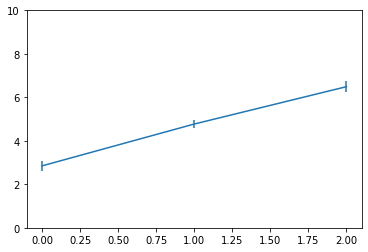

In [77]:
ax = plt.gca()
ax.set_ylim([0, 10])
plt.errorbar([0, 1, 2], mean, standard_deviations)
plt.plot()

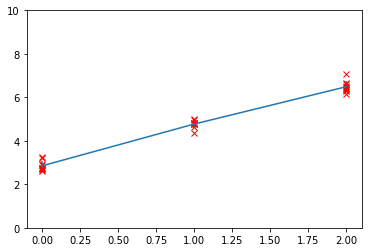

In [78]:
ax = plt.gca()
ax.set_ylim([0, 10])
plt.errorbar([0, 1, 2], mean, standard_deviations)
plt.plot()
for i in range(3):
    for width in d[f"hypha{i}"]:
        plt.plot(i, width, marker="x", color="red")